In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean

In [2]:
from sklearn.metrics import mean_absolute_error

## Load The Data

In [3]:
Df_Cars = pd.read_csv('cleaned_cars_data.csv')
Df_Cars.head()

,it,bt,km,transmission,ownerNo,oem,model,modelYear,price_in_lakhs,Insurance Validity,...,Seats,Safety_count,top_features_count,Color,No of Cylinder,Turbo Charger,Super Charger,City,Power,Torque
0,0,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,4.00,third party insurance,...,5,13,8,White,3.0,no,no,Bangalore,67.04,90.00
1,0,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,8.11,comprehensive,...,5,27,9,White,3.0,no,no,Bangalore,121.31,150.00
2,0,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,5.85,comprehensive,...,5,24,9,Red,3.0,no,no,Bangalore,84.00,114.00
3,0,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,comprehensive,...,5,18,9,Others,4.0,no,no,Bangalore,81.86,113.75
4,0,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,third party insurance,...,5,22,9,Gray,4.0,yes,no,Bangalore,88.50,200.00


## EDA

In [4]:
Df_Cars.describe()

,it,km,ownerNo,modelYear,price_in_lakhs,Seats,Safety_count,top_features_count,No of Cylinder,Power,Torque
count,8276.0,8.276000e+03,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000,8276.000000
mean,0.0,5.888971e+04,1.356452,2016.558241,9.936547,5.203842,23.011358,8.842315,3.798816,105.123785,177.624404
std,0.0,7.432604e+04,0.636879,3.814314,12.401445,0.663882,7.044553,0.604037,0.558161,46.305179,109.778957
min,0.0,0.000000e+00,0.000000,1985.000000,1.000000,2.000000,0.000000,0.000000,2.000000,25.400000,4.800000
25%,0.0,3.000000e+04,1.000000,2014.000000,4.047500,5.000000,19.000000,9.000000,4.000000,78.900000,110.000000
50%,0.0,5.348550e+04,1.000000,2017.000000,6.200000,5.000000,24.000000,9.000000,4.000000,88.600000,140.000000
75%,0.0,8.000000e+04,2.000000,2019.000000,9.750000,5.000000,28.000000,9.000000,4.000000,118.360000,215.000000
max,0.0,5.500000e+06,5.000000,2023.000000,99.000000,10.000000,48.000000,9.000000,8.000000,576.630000,850.000000


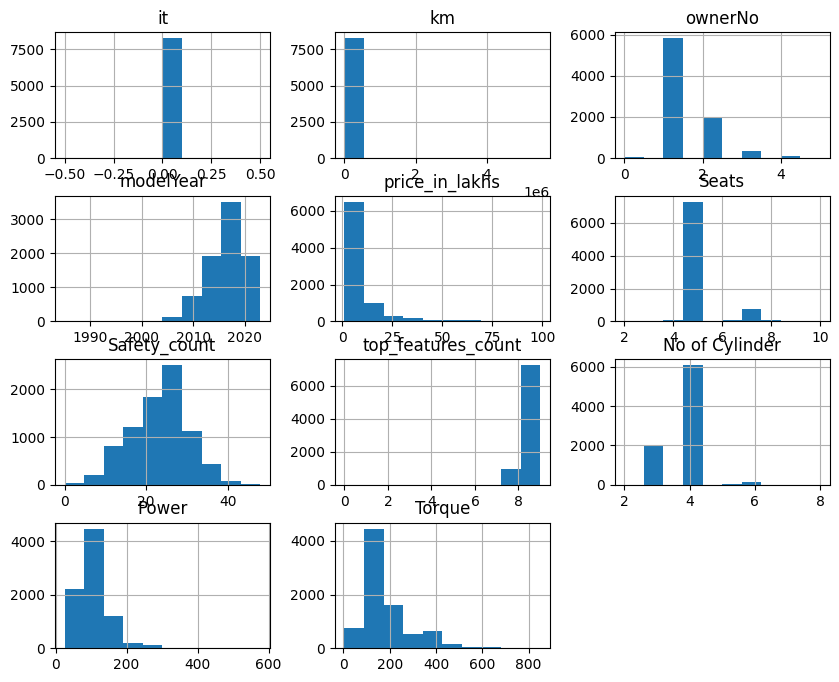

In [5]:
Df_Cars.hist(figsize=(10,8))
plt.show()

<Axes: >

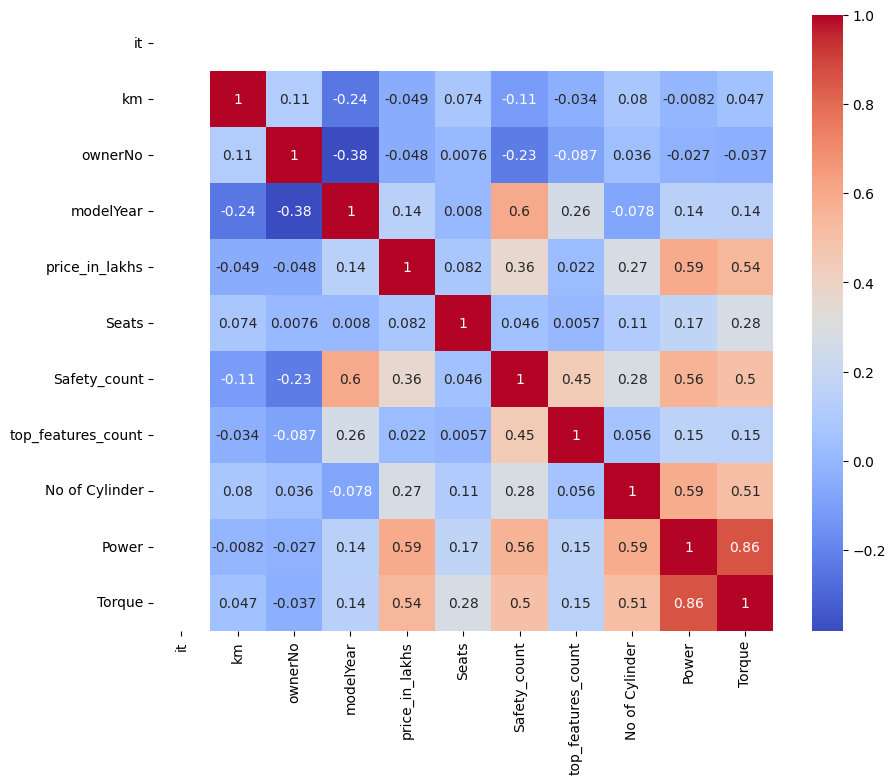

In [6]:
# get numeric columns
numeric_columns = Df_Cars.select_dtypes(include=[np.number]).columns.tolist()

# calc correlation and display heatmap for multicollinearity check
correlation_matrix = Df_Cars[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

-- There is little bit high correlation between power and Torque.

-- It's because in general engines that produce more Torque tend to produce more power, but there are some exceptions.

-- so, I'm gonna drop a feature(Torque) that less correlated with price.

In [7]:
# drop Torque column from dataframe
Df_Cars.drop(['it','Torque'], axis=1, inplace=True)

In [8]:
Df_Cars.to_csv("cleaned_cars_data2.csv", index=False)

## check correlation between categorical variable and Price

<Axes: xlabel='transmission', ylabel='price_in_lakhs'>

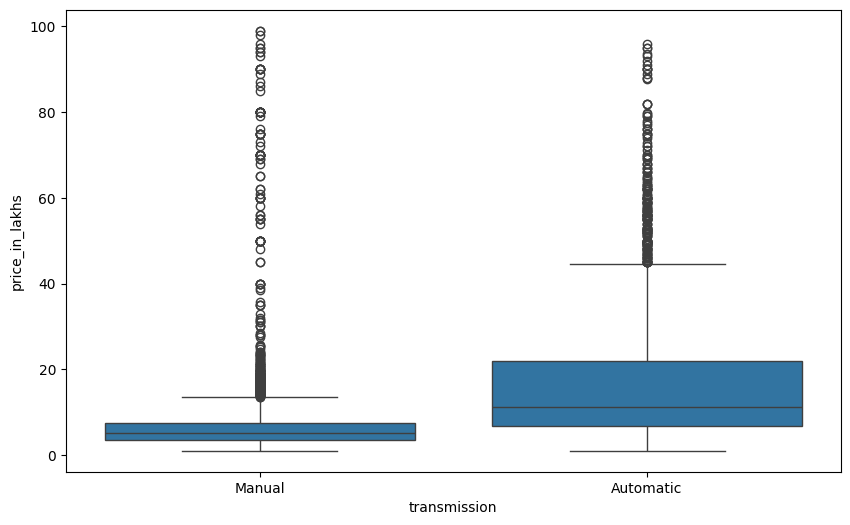

In [ ]:
# box plot between transmission and price column
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price_in_lakhs', data=Df_Cars)

-- looks like there is some correlation between transmisson and price

<Axes: xlabel='bt', ylabel='price_in_lakhs'>

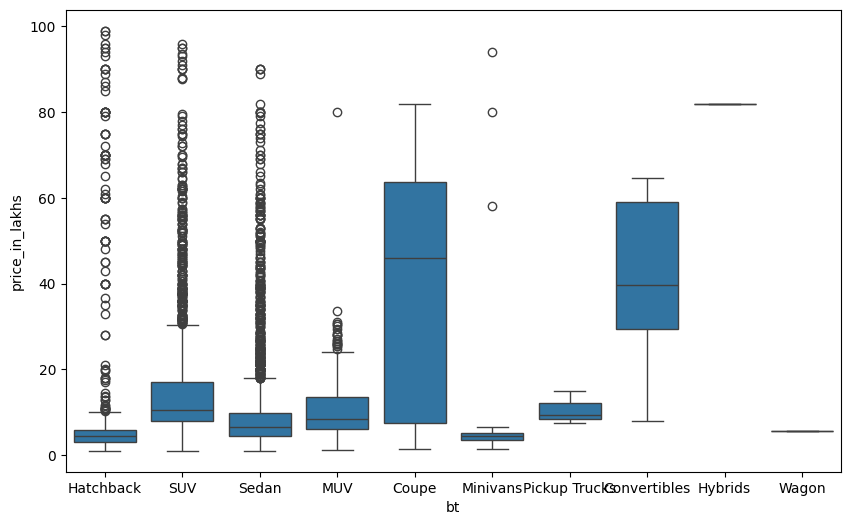

In [ ]:
# body type and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='bt', y='price_in_lakhs', data=Df_Cars)

-- As the boxes didn't align there is some correlation between body type and price

<Axes: xlabel='oem', ylabel='price_in_lakhs'>

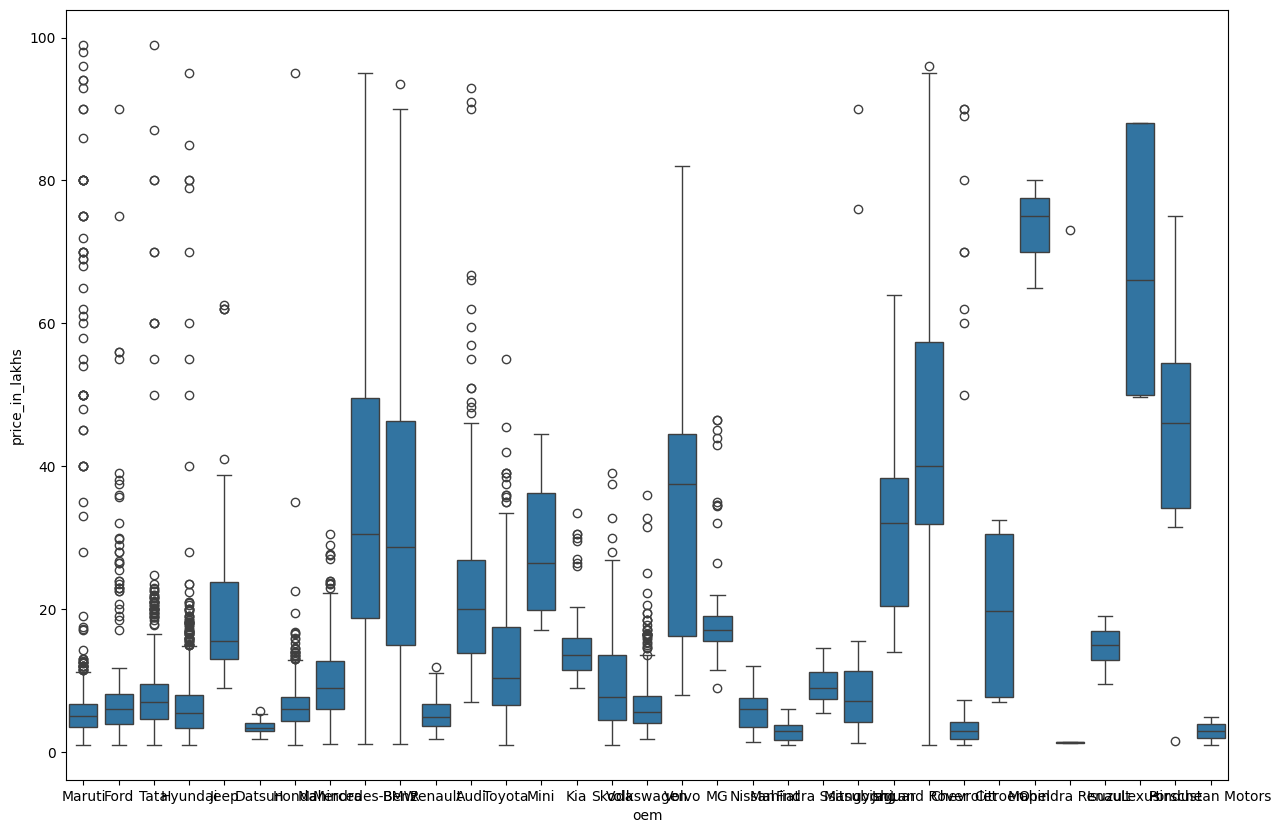

In [ ]:
# model vs price
plt.figure(figsize=(15, 10))
sns.boxplot(x='oem', y='price_in_lakhs', data=Df_Cars)

<Axes: xlabel='Insurance Validity', ylabel='price_in_lakhs'>

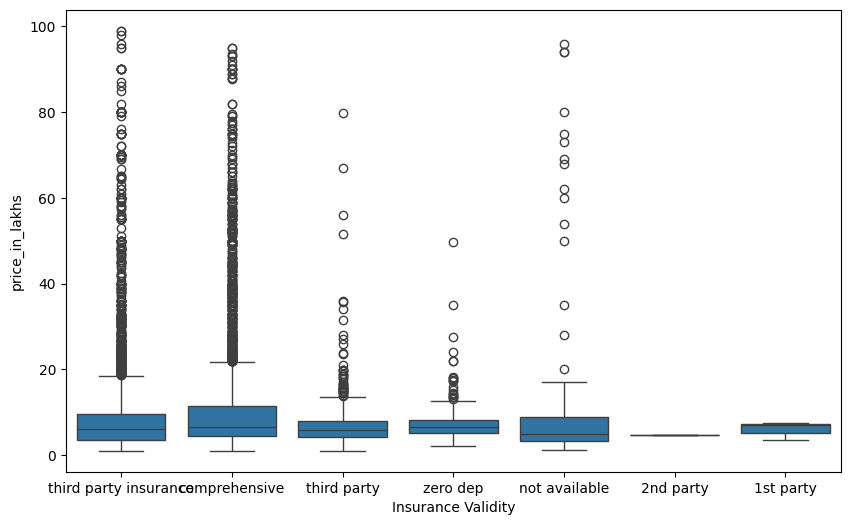

In [ ]:
# Insurance vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Validity', y='price_in_lakhs', data=Df_Cars)

-- even though there is slight differences, It seems there is no much correlation between Insurance and price.


<Axes: xlabel='Fuel Type', ylabel='price_in_lakhs'>

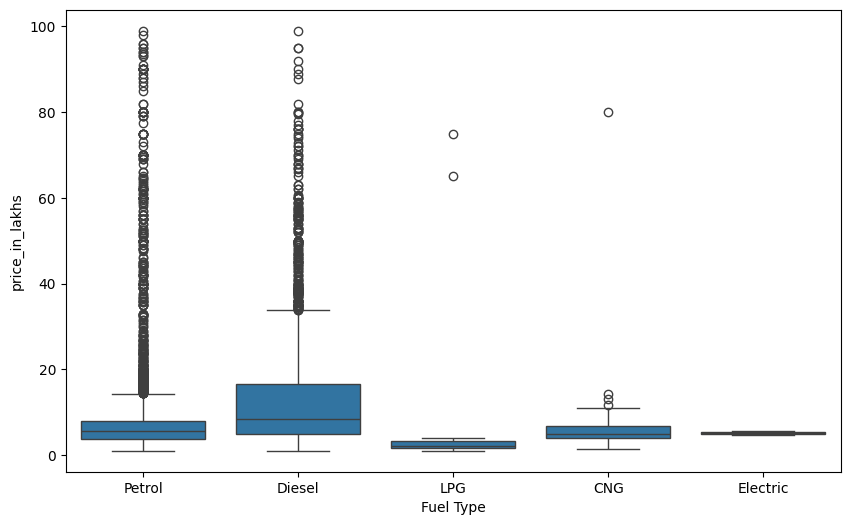

In [ ]:
# Fuel type vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='price_in_lakhs', data=Df_Cars)

-- There is some correlation between fuel and price, the distributions definitely vary.

<Axes: xlabel='Color', ylabel='price_in_lakhs'>

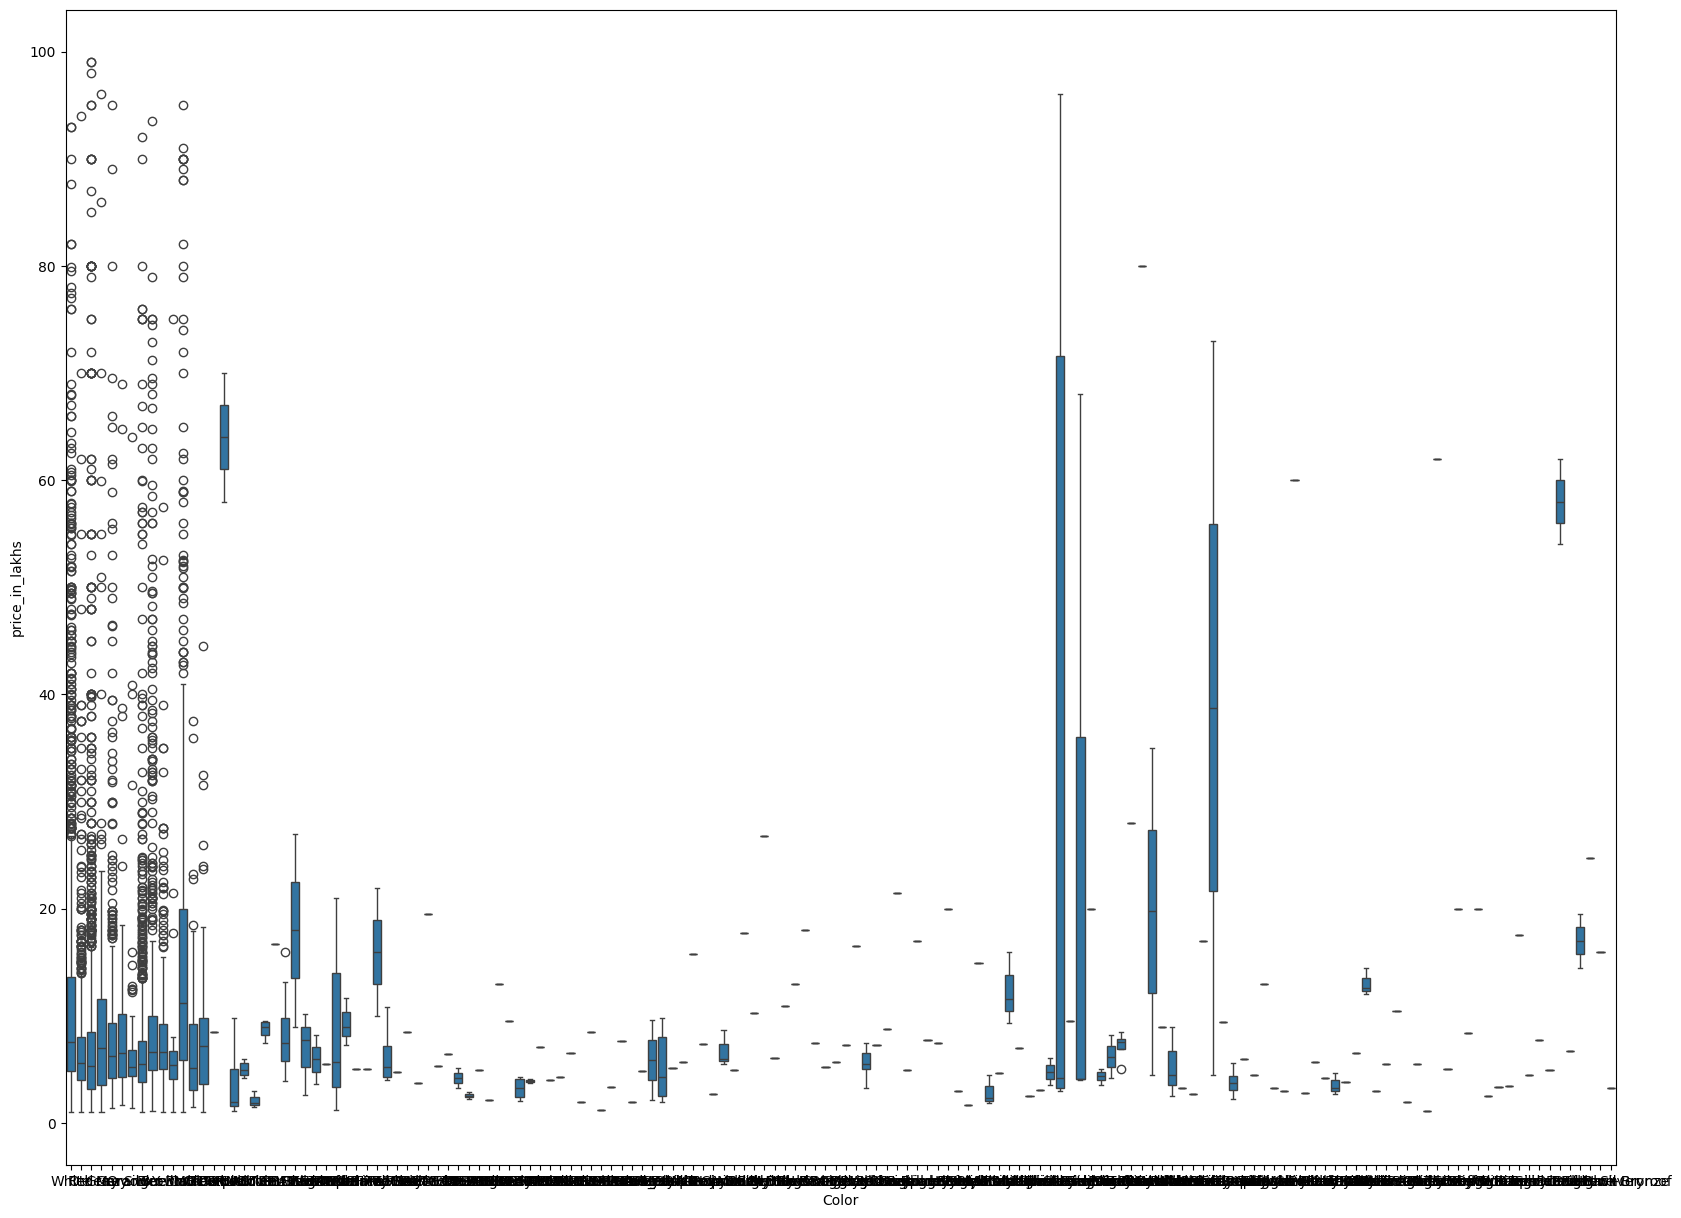

In [ ]:
# color vs Price
plt.figure(figsize=(20, 15))
sns.boxplot(x='Color', y='price_in_lakhs', data=Df_Cars)

-- it seems there is defintely a lot of correlation between colors and price for resale value

<Axes: xlabel='Turbo Charger', ylabel='price_in_lakhs'>

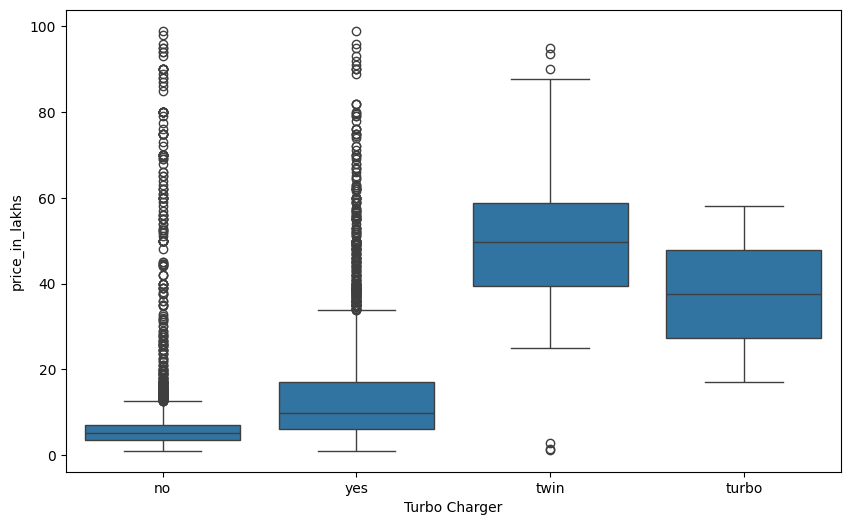

In [ ]:
# Turbo Charger vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Turbo Charger', y='price_in_lakhs', data=Df_Cars)

<Axes: xlabel='Super Charger', ylabel='price_in_lakhs'>

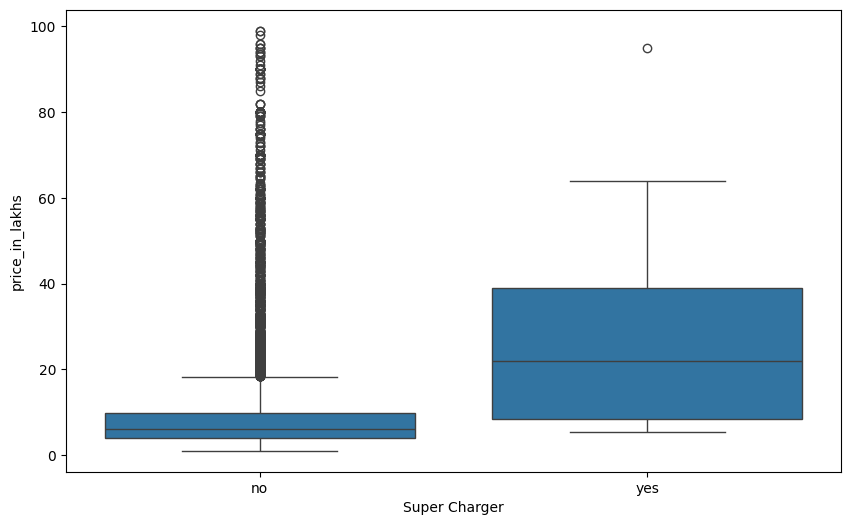

In [ ]:
# Super Charger vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Super Charger', y='price_in_lakhs', data=Df_Cars)

-- Turbo and Super charger play a crucial role in Price

<Axes: xlabel='City', ylabel='price_in_lakhs'>

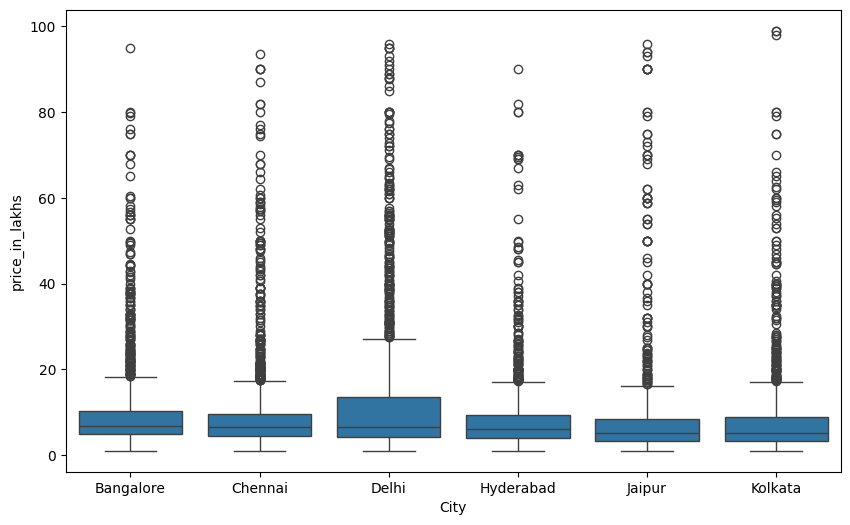

In [ ]:
# City vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='price_in_lakhs', data=Df_Cars)

## Target and Feature seperation

In [ ]:
Df_X = Df_Cars.drop('price_in_lakhs', axis=1)
Df_y = Df_Cars['price_in_lakhs']

## Standardization

In [ ]:
# standardizing numerical data
scaler = StandardScaler()
numeric_columns = Df_X.select_dtypes(include=[np.number]).columns.tolist()
Df_X[numeric_columns] = scaler.fit_transform(Df_X[numeric_columns])
Df_X.head()

,bt,km,transmission,ownerNo,oem,model,modelYear,Insurance Validity,Fuel Type,Seats,Safety_count,top_features_count,Color,No of Cylinder,Turbo Charger,Super Charger,City,Power
0,Hatchback,0.822242,Manual,2.580783,Maruti,Maruti Celerio,-0.408549,third party insurance,Petrol,-0.307065,-1.421235,-1.394561,White,-1.431242,no,no,Bangalore,-0.822502
1,SUV,-0.352303,Manual,1.010531,Ford,Ford Ecosport,0.378009,comprehensive,Petrol,-0.307065,0.566236,0.261067,White,-1.431242,no,no,Bangalore,0.349576
2,Hatchback,-0.631589,Manual,-0.559720,Tata,Tata Tiago,0.378009,comprehensive,Petrol,-0.307065,0.140350,0.261067,Red,-1.431242,no,no,Bangalore,-0.456214
3,Sedan,-0.552945,Manual,-0.559720,Hyundai,Hyundai Xcent,-0.670735,comprehensive,Petrol,-0.307065,-0.711424,0.261067,Others,0.360463,no,no,Bangalore,-0.502432
4,SUV,0.014939,Manual,-0.559720,Maruti,Maruti SX4 S Cross,-0.408549,third party insurance,Diesel,-0.307065,-0.143575,0.261067,Gray,0.360463,yes,no,Bangalore,-0.359027


In [ ]:
# onehot encoding all categorical features
encoder = OneHotEncoder(sparse_output=False)
category_columns = Df_X.select_dtypes(include=['object']).columns.tolist()
encoded_features = encoder.fit_transform(Df_X[category_columns])
Df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(category_columns))

Df_encoded.head()

,bt_Convertibles,bt_Coupe,bt_Hatchback,bt_Hybrids,bt_MUV,bt_Minivans,bt_Pickup Trucks,bt_SUV,bt_Sedan,bt_Wagon,...,Turbo Charger_twin,Turbo Charger_yes,Super Charger_no,Super Charger_yes,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# concat encoded to Df_X
Df_X = pd.concat([Df_X.drop(category_columns, axis=1), Df_encoded], axis=1)
Df_X.head()

,km,ownerNo,modelYear,Seats,Safety_count,top_features_count,No of Cylinder,Power,bt_Convertibles,bt_Coupe,...,Turbo Charger_twin,Turbo Charger_yes,Super Charger_no,Super Charger_yes,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,0.822242,2.580783,-0.408549,-0.307065,-1.421235,-1.394561,-1.431242,-0.822502,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.352303,1.010531,0.378009,-0.307065,0.566236,0.261067,-1.431242,0.349576,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.631589,-0.559720,0.378009,-0.307065,0.140350,0.261067,-1.431242,-0.456214,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.552945,-0.559720,-0.670735,-0.307065,-0.711424,0.261067,0.360463,-0.502432,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014939,-0.559720,-0.408549,-0.307065,-0.143575,0.261067,0.360463,-0.359027,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Model Build and Evaluation

In [ ]:
# train and test split
Df_X_train, Df_X_test, Df_y_train, Df_y_test = train_test_split(Df_X, Df_y, test_size=0.2, random_state=42)

In [ ]:
# list of all models with thier name
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))

# save the neg MSE in results
results = []

for name, model in models:
  kFold = KFold(n_splits=5, shuffle=True, random_state=42)
  cv_results = cross_val_score(model, Df_X_train, Df_y_train, cv=kFold, scoring='neg_mean_squared_error')
  print(f'{name}: {cv_results.mean()}')
  results.append((name, cv_results.mean()))

Linear Regression: -2.4923750595400183e+22
Decision Tree Regression: -101.16455117656933
Random Forest Regression: -60.441207434226826
Gradient Boosting Regression: -61.79942686847308


In [ ]:
# let's evaluate all the model using R-square score
for name, model in models:
  model.fit(Df_X_train, Df_y_train)
  print(f'{name} Training Score: {model.score(Df_X_train, Df_y_train)}')
  print(f'{name} Testing Score: {model.score(Df_X_test, Df_y_test)}')



Linear Regression Training Score: 0.7110103794479934
Linear Regression Testing Score: -8.318534777934771e+17
Decision Tree Regression Training Score: 0.9998335289736305
Decision Tree Regression Testing Score: 0.4571820690426849
Random Forest Regression Training Score: 0.9538927087512368
Random Forest Regression Testing Score: 0.7003448734930089
Gradient Boosting Regression Training Score: 0.7685856727766833
Gradient Boosting Regression Testing Score: 0.6501438867931558


## L2 Regularization

In [ ]:
# Ridge (L2) Regression
cross_val_scores_ridge = []
alpha_values = []

# finds the best alpha value for the model 
for i in range(1, 9):
    ridgeModel = Ridge(alpha=i * 0.25)
    ridgeModel.fit(Df_X_train, Df_y_train)
    scores = cross_val_score(ridgeModel, Df_X, Df_y, cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha_values.append(i * 0.25)

In [ ]:
best_alpha_ridge = alpha_values[np.argmax(cross_val_scores_ridge)]
ridgeModelChosen = Ridge(alpha=best_alpha_ridge)
ridgeModelChosen.fit(Df_X_train, Df_y_train)
print("Ridge Regression Score:", ridgeModelChosen.score(Df_X_test, Df_y_test))

Ridge Regression Score: 0.5315679555593336


In [ ]:
# Lasso (L1) Regression
cross_val_scores_lasso = []
lambda_values = []

# find the best lambda for lasso
for i in range(1, 9):
    lassoModel = Lasso(alpha=i * 0.25, tol=0.0925)
    lassoModel.fit(Df_X_train, Df_y_train)
    scores = cross_val_score(lassoModel, Df_X, Df_y, cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_lasso.append(avg_cross_val_score)
    lambda_values.append(i * 0.25)

In [ ]:
best_lambda_lasso = lambda_values[np.argmax(cross_val_scores_lasso)]
lassoModelChosen = Lasso(alpha=best_lambda_lasso, tol=0.0925)
lassoModelChosen.fit(Df_X_train, Df_y_train)
print("Lasso Regression Score:", lassoModelChosen.score(Df_X_test, Df_y_test))

Lasso Regression Score: 0.3495853036934399


In [ ]:
# let's train the model using random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Df_X_train, Df_y_train)
print("Random Forest Regression Training Score:", rf.score(Df_X_train, Df_y_train))
print("Random Forest Regression Score:", rf.score(Df_X_test, Df_y_test))

Random Forest Regression Training Score: 0.9545534143587022
Random Forest Regression Score: 0.7013524679989629


## Hyperparameter Tuning

In [ ]:
random_params = {'n_estimators': [100, 200, 300, 400, 600],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [3, 4, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rscv = RandomizedSearchCV(rf, random_params, cv=5, n_jobs=-1, verbose=2, random_state=42)
rscv.fit(Df_X_train, Df_y_train)
print(f'randomSeachCV Best Score: {rscv.best_score_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
randomSeachCV Best Score: 0.6505833045703286


In [ ]:
rf_pred = rf.predict(Df_X_test)
print(f'Random Forest Regression MSE: {mean_squared_error(Df_y_test, rf_pred)}')
print(f'Random Forest Regression R2 Score: {r2_score(Df_y_test, rf_pred)}')
print(f'Random Forest Regression MAE: {mean_absolute_error(Df_y_test, rf_pred)}')

Random Forest Regression MSE: 41.77915232243856
Random Forest Regression R2 Score: 0.7013524679989629
Random Forest Regression MAE: 2.026896653798597
